In [29]:
import pandas as pan
# Q1: a
x = pan.read_csv('data.csv')

In [30]:
# c
x.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [31]:
# d
x.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [32]:
# d - i

x.fillna(x.mean(),inplace=True)
x.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [33]:
# e
x.agg({'Pulse':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})

,Pulse,Maxpulse
min,80.000000,100.000000
max,159.000000,184.000000
count,169.000000,169.000000
mean,107.461538,134.047337


In [34]:
# f
#filter the dataframe to select the rows btwn 500 and 1000
x.loc[(x['Calories']>500)&(x['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [38]:
# g
# filter the dataframe to select the rows with calorie values > 500 and pulse < 100
x.loc[(x['Calories']>500)&(x['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [39]:
# h
#create a new dataframe that contains all columns except Maxpulse
df_modified=x[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [40]:
# i
del x['Maxpulse']

In [41]:
x.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [42]:
# j
# Convert the datatype of Calories column to int datatype.
x.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [43]:
x = x.astype({'Calories':int})
x.dtypes

Duration    int64
Pulse       int64
Calories    int32
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

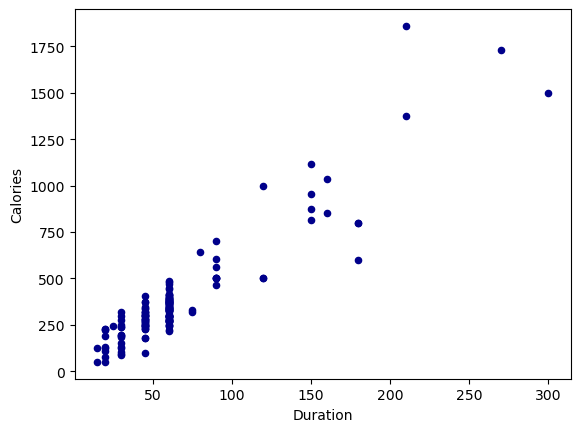

In [44]:
# create a scatter plot for the 2 columns (Duration and Calories)
x.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [48]:
# 2 - Linear Regression 
# a
df =pd.read_csv("Salary_Data (2).csv")

In [49]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
# b
# split the data in train_test partitions,such that 1/3 of the data is reserved as test subset
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=1/3,random_state=0)

In [51]:
# c
# train and predict the model
regressor=LinearRegression()
regressor.fit(X_Train,Y_Train)

Y_Pred=regressor.predict(X_Test)

In [52]:
# d
# calculate the mean squared error
mean_squared_error(Y_Test,Y_Pred)

21026037.329511296

<function matplotlib.pyplot.show(close=None, block=None)>

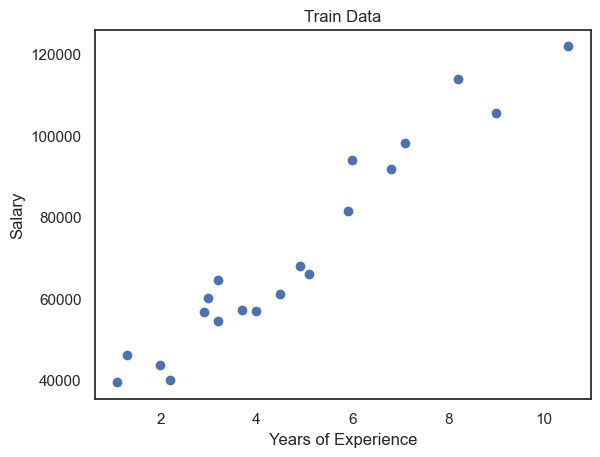

In [53]:
# e
#visualize both train and test data using scatter plot
plt.title("Train Data")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Train,Y_Train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

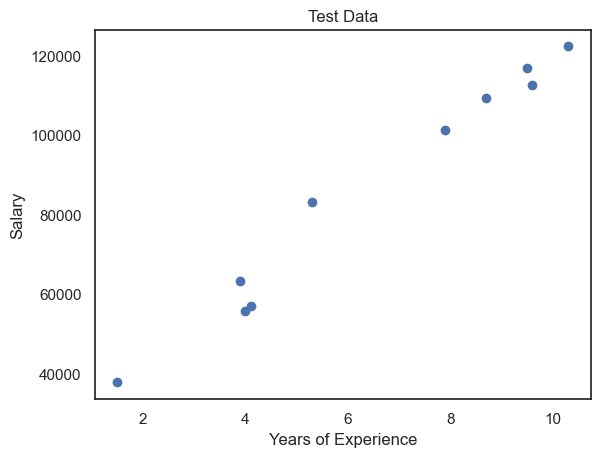

In [55]:
plt.title("Test Data")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Test,Y_Test)
plt.show